<a href="https://colab.research.google.com/github/NehaMaradi/-flash-drought-prediction-1/blob/main/LSTM(timeseries_data)_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files

# Upload local CSV file
uploaded = files.upload()

# Get the uploaded file name
for fn in uploaded.keys():
    filename = fn
    print(f'Uploaded file: {filename}')

# Read CSV
df = pd.read_csv(filename)

# Show basic info
print("Dataset shape:", df.shape)
df.head()


Saving Monthly_FlashDrought_Data_India.csv to Monthly_FlashDrought_Data_India.csv
Uploaded file: Monthly_FlashDrought_Data_India.csv
Dataset shape: (19200, 19)


,system:index,ADM0_CODE,ADM0_NAME,ADM1_CODE,ADM1_NAME,ADM2_CODE,ADM2_NAME,DISP_AREA,EXP2_YEAR,Rainf_f_tavg,STATUS,STR2_YEAR,Shape_Area,Shape_Leng,SoilMoi0_10cm_inst,Tair_f_inst,month,year,.geo
0,0_00010000000000001747,115,India,1506,Rajasthan,17838,Bharatpur,NO,3000,0.000020,Member State,1990,0.460272,6.173368,19.937699,286.501119,1.0,2014.0,"{""type"":""Polygon"",""coordinates"":[[[76.97049638..."
1,0_0001000000000000174d,115,India,1506,Rajasthan,17844,Dhaulpur,NO,3000,0.000016,Member State,1990,0.274339,3.592474,19.992519,287.192180,1.0,2014.0,"{""type"":""Polygon"",""coordinates"":[[[77.34160509..."
2,0_00010000000000001756,115,India,1506,Rajasthan,17853,Kota,NO,3000,0.000015,Member State,1991,0.492613,6.107466,22.930958,289.033957,1.0,2014.0,"{""type"":""Polygon"",""coordinates"":[[[75.62114560..."
3,0_0001000000000000175e,115,India,1506,Rajasthan,70236,Baran,NO,3000,0.000014,Member State,1991,0.610190,5.707373,21.651911,289.650103,1.0,2014.0,"{""type"":""Polygon"",""coordinates"":[[[76.84116904..."
4,0_00010000000000001750,115,India,1506,Rajasthan,17847,Jaipur,NO,3000,0.000016,Member State,1996,1.022299,7.268674,16.547335,287.370980,1.0,2014.0,"{""type"":""Polygon"",""coordinates"":[[[76.08009418..."


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('Monthly_FlashDrought_Data_India.csv')

# Inspect first 10 rows
print(df.head(10))

# Check columns and data types
print(df.info())

# Check for missing values
print(df.isnull().sum())


             system:index  ADM0_CODE ADM0_NAME  ADM1_CODE  ADM1_NAME  \
0  0_00010000000000001747        115     India       1506  Rajasthan   
1  0_0001000000000000174d        115     India       1506  Rajasthan   
2  0_00010000000000001756        115     India       1506  Rajasthan   
3  0_0001000000000000175e        115     India       1506  Rajasthan   
4  0_00010000000000001750        115     India       1506  Rajasthan   
5  0_0001000000000000175d        115     India       1506  Rajasthan   
6  0_0001000000000000175f        115     India       1506  Rajasthan   
7  0_00010000000000001762        115     India       1506  Rajasthan   
8  0_00010000000000001759        115     India       1506  Rajasthan   
9  0_00010000000000001761        115     India       1506  Rajasthan   

   ADM2_CODE       ADM2_NAME DISP_AREA  EXP2_YEAR  Rainf_f_tavg        STATUS  \
0      17838       Bharatpur        NO       3000      0.000020  Member State   
1      17844        Dhaulpur        NO       

In [ ]:
# Drop unnecessary columns
df_ml = df.drop(columns=['system:index', 'ADM0_CODE', 'ADM0_NAME',
                         'ADM1_CODE', 'EXP2_YEAR', 'STATUS',
                         'STR2_YEAR', 'Shape_Area', 'Shape_Leng', '.geo', 'DISP_AREA'])

# Rename columns for easier reference
df_ml.rename(columns={
    'ADM1_NAME': 'state',
    'ADM2_NAME': 'district',
    'Rainf_f_tavg': 'rainfall',
    'SoilMoi0_10cm_inst': 'soil_moisture',
    'Tair_f_inst': 'temperature',
    'month': 'month',
    'year': 'year'
}, inplace=True)

# Handle missing values (forward fill within each district)
df_ml = df_ml.groupby(['state', 'district']).ffill().bfill()

# Create datetime column
df_ml['date'] = pd.to_datetime(df_ml[['year', 'month']].assign(DAY=1))

# Sort by state, district, date
df_ml = df_ml.sort_values(by=['state', 'district', 'date']).reset_index(drop=True)

# Check processed dataframe
print(df_ml.head(10))
print(df_ml.info())


KeyError: 'state'

In [ ]:
# Print all column names with markers to see hidden spaces
print([f"'{col}'" for col in df.columns])


["'system:index'", "'ADM0_CODE'", "'ADM0_NAME'", "'ADM1_CODE'", "'ADM1_NAME'", "'ADM2_CODE'", "'ADM2_NAME'", "'DISP_AREA'", "'EXP2_YEAR'", "'Rainf_f_tavg'", "'STATUS'", "'STR2_YEAR'", "'Shape_Area'", "'Shape_Leng'", "'SoilMoi0_10cm_inst'", "'Tair_f_inst'", "'month'", "'year'", "'.geo'"]


In [ ]:
# Start fresh from the original dataframe
df_ml = df.copy()


In [ ]:
df_ml.drop(columns=['system:index', 'ADM0_CODE', 'ADM0_NAME',
                    'ADM1_CODE', 'EXP2_YEAR', 'STATUS',
                    'STR2_YEAR', 'Shape_Area', 'Shape_Leng', '.geo', 'DISP_AREA'], inplace=True)


In [ ]:
df_ml.rename(columns={
    'ADM1_NAME': 'state',
    'ADM2_NAME': 'district',
    'Rainf_f_tavg': 'rainfall',
    'SoilMoi0_10cm_inst': 'soil_moisture',
    'Tair_f_inst': 'temperature',
    'month': 'month',
    'year': 'year'
}, inplace=True)


In [ ]:
print(df_ml.columns)   # Make sure 'state' and 'district' exist now


Index(['state', 'ADM2_CODE', 'district', 'rainfall', 'soil_moisture',
       'temperature', 'month', 'year'],
      dtype='object')


In [ ]:
df_ml = df_ml.groupby(['state', 'district']).ffill().bfill()


In [ ]:
df_ml['date'] = pd.to_datetime(df_ml[['year', 'month']].assign(DAY=1))



In [ ]:
df_ml[['year', 'month', 'date']].head(10)



,year,month,date
0,2014.0,1.0,2014-01-01
1,2014.0,1.0,2014-01-01
2,2014.0,1.0,2014-01-01
3,2014.0,1.0,2014-01-01
4,2014.0,1.0,2014-01-01
5,2014.0,1.0,2014-01-01
6,2014.0,1.0,2014-01-01
7,2014.0,1.0,2014-01-01
8,2014.0,1.0,2014-01-01
9,2014.0,1.0,2014-01-01


In [ ]:
# Check exact column names
print(df_ml.columns.tolist())

# Strip spaces if any
df_ml.columns = df_ml.columns.str.strip()




['ADM2_CODE', 'rainfall', 'soil_moisture', 'temperature', 'month', 'year', 'date']


In [ ]:
df_ml = df_ml.sort_values(by=['ADM2_CODE', 'date']).reset_index(drop=True)
df_ml.head(10)



,ADM2_CODE,rainfall,soil_moisture,temperature,month,year,date
0,17594,0.000008,19.543428,289.151191,1.0,2014.0,2014-01-01
1,17594,0.000032,18.130100,291.892695,2.0,2014.0,2014-02-01
2,17594,0.000007,19.402856,298.898834,3.0,2014.0,2014-03-01
3,17594,0.000001,10.995949,306.477716,4.0,2014.0,2014-04-01
4,17594,0.000026,14.572219,309.158445,5.0,2014.0,2014-05-01
5,17594,0.000050,22.028058,310.991435,6.0,2014.0,2014-06-01
6,17594,0.000099,29.171995,304.441941,7.0,2014.0,2014-07-01
7,17594,0.000132,31.664362,303.764982,8.0,2014.0,2014-08-01
8,17594,0.000093,31.169183,301.782525,9.0,2014.0,2014-09-01
9,17594,0.000024,27.740592,297.901705,10.0,2014.0,2014-10-01


In [ ]:
print(df_ml.isnull().sum())


ADM2_CODE        0
rainfall         0
soil_moisture    0
temperature      0
month            0
year             0
date             0
dtype: int64


In [ ]:
# Fill missing values with column mean
df_ml['rainfall'] = df_ml['rainfall'].fillna(df_ml['rainfall'].mean())
df_ml['soil_moisture'] = df_ml['soil_moisture'].fillna(df_ml['soil_moisture'].mean())
df_ml['temperature'] = df_ml['temperature'].fillna(df_ml['temperature'].mean())

# Verify no missing values remain
print(df_ml.isnull().sum())


ADM2_CODE        0
rainfall         0
soil_moisture    0
temperature      0
month            0
year             0
date             0
dtype: int64


In [ ]:
df_ml.info()
df_ml.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19200 entries, 0 to 19199
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ADM2_CODE      19200 non-null  int64         
 1   rainfall       19200 non-null  float64       
 2   soil_moisture  19200 non-null  float64       
 3   temperature    19200 non-null  float64       
 4   month          19200 non-null  float64       
 5   year           19200 non-null  float64       
 6   date           19200 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 1.0 MB


,ADM2_CODE,rainfall,soil_moisture,temperature,month,year,date
0,17594,0.000008,19.543428,289.151191,1.0,2014.0,2014-01-01
1,17594,0.000032,18.130100,291.892695,2.0,2014.0,2014-02-01
2,17594,0.000007,19.402856,298.898834,3.0,2014.0,2014-03-01
3,17594,0.000001,10.995949,306.477716,4.0,2014.0,2014-04-01
4,17594,0.000026,14.572219,309.158445,5.0,2014.0,2014-05-01


In [ ]:
# Define 20th percentile thresholds
rainfall_thresh = df_ml['rainfall'].quantile(0.2)
soil_thresh = df_ml['soil_moisture'].quantile(0.2)

# Create flash drought label
df_ml['flash_drought'] = ((df_ml['rainfall'] <= rainfall_thresh) &
                          (df_ml['soil_moisture'] <= soil_thresh)).astype(int)

# Check distribution
print(df_ml['flash_drought'].value_counts())


flash_drought
0    17427
1     1773
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np

# Sort by district and date
df_ml = df_ml.sort_values(by=['ADM2_CODE', 'date']).reset_index(drop=True)

# Create lag features (previous month)
for lag in [1, 2, 3]:  # You can adjust number of lags
    df_ml[f'rainfall_lag{lag}'] = df_ml.groupby('ADM2_CODE')['rainfall'].shift(lag)
    df_ml[f'soil_moisture_lag{lag}'] = df_ml.groupby('ADM2_CODE')['soil_moisture'].shift(lag)
    df_ml[f'temperature_lag{lag}'] = df_ml.groupby('ADM2_CODE')['temperature'].shift(lag)

# Drop rows with NaNs created by lag
df_ml = df_ml.dropna().reset_index(drop=True)

# One-hot encode month for XGBoost
df_ml = pd.get_dummies(df_ml, columns=['month'], drop_first=True)

# Features and target
features = [col for col in df_ml.columns if col not in ['flash_drought', 'date', 'ADM2_CODE']]
X = df_ml[features]
y = df_ml['flash_drought']


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Scale features between 0-1 for LSTM
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_ml[features])

# Create sequences per district
def create_sequences(X, y, seq_length=6):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_length):
        X_seq.append(X[i:i+seq_length])
        y_seq.append(y[i+seq_length])
    return np.array(X_seq), np.array(y_seq)

# Assuming we train on one district at a time
districts = df_ml['ADM2_CODE'].unique()
X_lstm_all, y_lstm_all = [], []

for d in districts:
    df_d = df_ml[df_ml['ADM2_CODE']==d].reset_index(drop=True)
    X_scaled_d = scaler.fit_transform(df_d[features])
    y_d = df_d['flash_drought'].values
    X_seq, y_seq = create_sequences(X_scaled_d, y_d, seq_length=6)
    X_lstm_all.append(X_seq)
    y_lstm_all.append(y_seq)

X_lstm_all = np.concatenate(X_lstm_all, axis=0)
y_lstm_all = np.concatenate(y_lstm_all, axis=0)


In [ ]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Features and target
X = df_ml.drop(columns=['flash_drought', 'date'])  # drop target and date
y = df_ml['flash_drought']

# Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Train samples: {len(X_train)}, Test samples: {len(X_test)}")


Train samples: 14976, Test samples: 3744


In [ ]:
# Initialize XGBoost
xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred = xgb_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9986645299145299
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3402
           1       0.99      0.99      0.99       342

    accuracy                           1.00      3744
   macro avg       1.00      1.00      1.00      3744
weighted avg       1.00      1.00      1.00      3744

Confusion Matrix:
 [[3399    3]
 [   2  340]]


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Features to use
features = ['rainfall', 'soil_moisture', 'temperature']

# Scale features for LSTM
scaler = MinMaxScaler()
df_ml[features] = scaler.fit_transform(df_ml[features])

# Sort by district and date
df_ml = df_ml.sort_values(by=['ADM2_CODE', 'date']).reset_index(drop=True)

# Convert to sequences
def create_sequences(df, seq_length=12):
    X, y = [], []
    districts = df['ADM2_CODE'].unique()

    for district in districts:
        district_data = df[df['ADM2_CODE']==district]
        feature_array = district_data[features].values
        label_array = district_data['flash_drought'].values

        for i in range(len(district_data) - seq_length):
            X.append(feature_array[i:i+seq_length])
            y.append(label_array[i+seq_length])  # predict next month
    return np.array(X), np.array(y)

seq_length = 12
X_lstm, y_lstm = create_sequences(df_ml, seq_length)
print("Sequences shape:", X_lstm.shape, y_lstm.shape)


Sequences shape: (16800, 12, 3) (16800,)


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute weights for classes (0 and 1)
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train),
                                     y=y_train)

class_weights_dict = dict(enumerate(class_weights))
print("Computed class weights:", class_weights_dict)


Computed class weights: {0: np.float64(0.5517694391986205), 1: np.float64(5.3291038858049165)}


In [ ]:
# Rebuild the same LSTM structure
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(32, activation='relu'))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train with class weights
history_balanced = lstm_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    class_weight=class_weights_dict,
    verbose=1
)


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


168/168 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8081 - loss: 0.6531 - val_accuracy: 0.6983 - val_loss: 0.5042
Epoch 2/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6981 - loss: 0.4703 - val_accuracy: 0.7020 - val_loss: 0.4642
Epoch 3/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6887 - loss: 0.4649 - val_accuracy: 0.8058 - val_loss: 0.3622
Epoch 4/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7351 - loss: 0.4243 - val_accuracy: 0.7716 - val_loss: 0.4085
Epoch 5/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7614 - loss: 0.4077 - val_accuracy: 0.7135 - val_loss: 0.5064
Epoch 6/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7588 - loss: 0.3897 - val_accuracy: 0.7902 - val_loss: 0.3953
Epoch 7/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7593 - loss: 0.3854 - val_accuracy: 0.6592 - val_loss: 0.5950
Epoch 8/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7748 - loss: 0.3646 - val_accuracy: 0.7969 - val_

✅ Balanced Model Test Accuracy: 0.7798
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.76      0.86      3028
           1       0.30      0.94      0.46       332

    accuracy                           0.78      3360
   macro avg       0.65      0.85      0.66      3360
weighted avg       0.92      0.78      0.82      3360



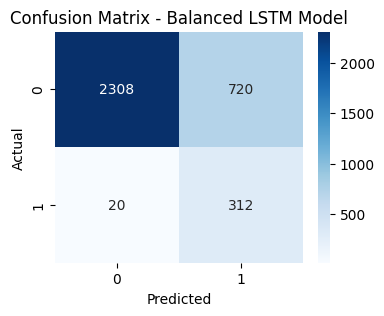

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate on test set
loss, acc = lstm_model.evaluate(X_test, y_test, verbose=0)
print(f"✅ Balanced Model Test Accuracy: {acc:.4f}")

# Predictions
y_pred_prob = lstm_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Balanced LSTM Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
lstm_model.save("lstm_flash_drought_model.h5")

import joblib
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [ ]:
# Save in the new recommended Keras format
lstm_model.save("lstm_flash_drought_model.keras")
print("✅ Model saved in new format as lstm_flash_drought_model.keras")


✅ Model saved in new format as lstm_flash_drought_model.keras


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 9 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.76      0.86      3028
           1       0.30      0.94      0.46       332

    accuracy                           0.78      3360
   macro avg       0.65      0.85      0.66      3360
weighted avg       0.92      0.78      0.82      3360

Accuracy: 0.7797619047619048


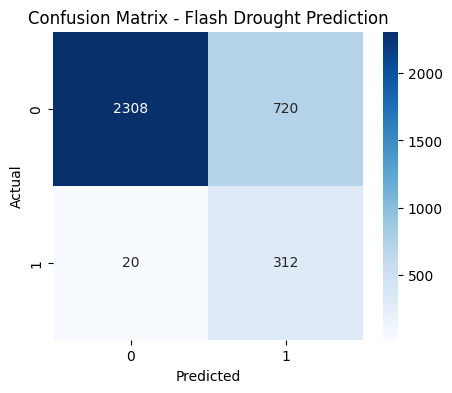

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Load test data and model
from tensorflow import keras

model = keras.models.load_model("lstm_flash_drought_model.keras")

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to 0/1

# ✅ Evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

print("Accuracy:", accuracy_score(y_test, y_pred_classes))

# ✅ Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Flash Drought Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [1]:
from tensorflow.keras.models import load_model

model = load_model('model/lstm_flash_drought_model.keras')


ValueError: File not found: filepath=model/lstm_flash_drought_model.keras. Please ensure the file is an accessible `.keras` zip file.